In [226]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from joblib import dump
from preprocess import prep_data
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV



## Plot the data

In [132]:
df = pd.read_csv("fish_participant.csv").assign(Species=lambda df: df["Species"].replace({
    "Perch":1,
    "Bream":2,
    "Roach":3,
    "Pike":4,
    "Smelt":5,
    "Parkki":6,
    "Whitefish":7
}))

print(df.head)
print(df.dtypes)



<bound method NDFrame.head of      Species  Weight  Length1  Length2  Length3   Height   Width
0          2   430.0     26.5     29.0     34.0  12.4440  5.1340
1          1   110.0     20.0     22.0     23.5   5.5225  3.9950
2          3   160.0     20.5     22.5     25.3   7.0334  3.8203
3          6    60.0     14.3     15.5     17.4   6.5772  2.3142
4          2   700.0     30.4     33.0     38.3  14.8604  5.2854
..       ...     ...      ...      ...      ...      ...     ...
106        1   197.0     23.5     25.6     27.0   6.5610  4.2390
107        6   140.0     19.0     20.7     23.2   8.5376  3.2944
108        3   110.0     19.1     20.8     23.1   6.1677  3.3957
109        1   685.0     34.0     36.5     39.0  10.8810  6.8640
110        1   300.0     26.9     28.7     30.1   7.5852  4.6354

[111 rows x 7 columns]>
Species      int64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


In [134]:
df_holdout = pd.read_csv("fish_holdout_demo.csv").assign(Species=lambda df: df["Species"].replace({
    "Perch":1,
    "Bream":2,
    "Roach":3,
    "Pike":4,
    "Smelt":5,
    "Parkki":6,
    "Whitefish":7
}))
df = df.append(df_holdout, ignore_index = True)

print(df.head)
print(df.dtypes)

<bound method NDFrame.head of      Species  Weight  Length1  Length2  Length3   Height   Width
0          2   430.0     26.5     29.0     34.0  12.4440  5.1340
1          1   110.0     20.0     22.0     23.5   5.5225  3.9950
2          3   160.0     20.5     22.5     25.3   7.0334  3.8203
3          6    60.0     14.3     15.5     17.4   6.5772  2.3142
4          2   700.0     30.4     33.0     38.3  14.8604  5.2854
..       ...     ...      ...      ...      ...      ...     ...
134        1  1000.0     39.8     43.0     45.2  11.9328  7.2772
135        2   720.0     32.0     35.0     40.6  16.3618  6.0900
136        1  1100.0     39.0     42.0     44.6  12.8002  6.8684
137        1   100.0     16.2     18.0     19.2   5.2224  3.3216
138        3   160.0     21.1     22.5     25.0   6.4000  3.8000

[139 rows x 7 columns]>
Species      int64
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


Text(0.5, 0, 'Height')

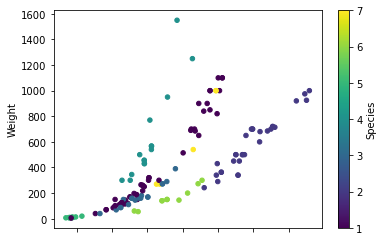

In [135]:
df.plot.scatter(x='Height', y='Weight', c='Species', colormap='viridis')
plt.xlabel("Height")

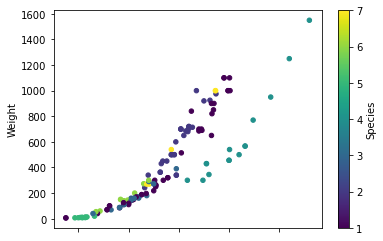

In [136]:
df.plot.scatter(x='Length1', y='Weight', c='Species', colormap='viridis')

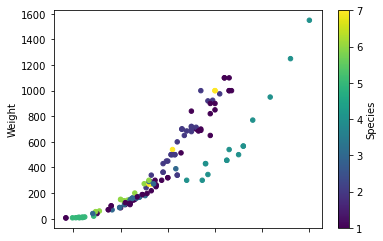

In [137]:
df.plot.scatter(x='Length2', y='Weight', c='Species', colormap='viridis')

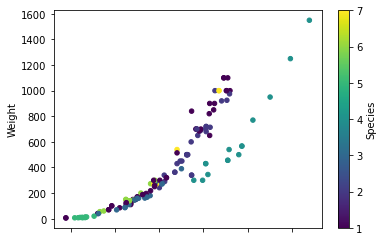

In [138]:
df.plot.scatter(x='Length3', y='Weight', c='Species', colormap='viridis')

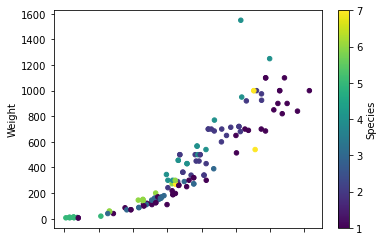

In [139]:
df.plot.scatter(x='Width', y='Weight', c='Species', colormap='viridis')

In [522]:
df = pd.read_csv("fish_participant.csv")

## Linear Regression

In [523]:
y=df["Weight"].values

X= pd.get_dummies(
    df[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values

In [525]:
cross_validate(lr, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-10593.094392257557

In [526]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df_holdout.columns if (column != "Weight") ]], drop_first = True
).values

In [527]:
lr.fit(X,y)
y_holdout = lr.predict(X_holdout)

In [528]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 156.0208366   134.91029739   19.10338299  423.19799966  545.23014341
  239.62370558  672.07689787   -5.92706377  543.16668901  435.61085219
  503.24673784  253.9560618   345.05986979  -19.20424444  436.66414066
  494.17850413 -386.3968948   597.02398346  131.66238157   49.61529386
  357.44149209  840.99925667  208.42824217  967.01387985  715.68963478
  938.50029072   21.16802245  133.02630695]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
12093.222165553118


## Linear Regression Scaled

In [529]:
lr_scaled = make_pipeline(StandardScaler(),
                         LinearRegression())

In [531]:
cross_validate(lr_scaled, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-10593.094392257608

In [532]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df_holdout.columns if (column != "Weight") ]], drop_first = True
).values

In [533]:
lr_scaled.fit(X,y)
y_holdout = lr_scaled.predict(X_holdout)

In [534]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 156.0208366   134.91029739   19.10338299  423.19799966  545.23014341
  239.62370558  672.07689787   -5.92706377  543.16668901  435.61085219
  503.24673784  253.9560618   345.05986979  -19.20424444  436.66414066
  494.17850413 -386.3968948   597.02398346  131.66238157   49.61529386
  357.44149209  840.99925667  208.42824217  967.01387985  715.68963478
  938.50029072   21.16802245  133.02630695]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
12093.22216555305


## DecisionTree  - Looks like this is the model that has highest accuracy

In [541]:
dt = DecisionTreeRegressor()

In [543]:
cross_validate(dt, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-6095.077347826087

In [544]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df_holdout.columns if (column != "Weight") ]], drop_first = True
).values

In [545]:
dt.fit(X,y)
dump(dt, 'dt.joblib') 
y_holdout = dt.predict(X_holdout)

In [546]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
0.0


In [383]:
dt_scaled = make_pipeline(StandardScaler(),
                         DecisionTreeRegressor())

In [384]:
cross_validate(dt_scaled, X,y, scoring =["neg_mean_squared_error", "neg_mean_absolute_error", "neg_median_absolute_error"],
              cv=KFold(random_state=123, shuffle=True))

{'fit_time': array([0.00398731, 0.00197554, 0.00199318, 0.00199485, 0.00099516]),
 'score_time': array([0.00199413, 0.00199509, 0.00099778, 0.0009985 , 0.00199533]),
 'test_neg_mean_squared_error': array([-6827.28913043, -2019.37636364, -9539.04590909, -8773.52590909,
        -7593.54954545]),
 'test_neg_mean_absolute_error': array([-53.90869565, -31.57272727, -57.68636364, -51.61363636,
        -56.10454545]),
 'test_neg_median_absolute_error': array([-50.  , -19.  , -30.5 , -25.  , -21.65])}

In [385]:
cross_validate(dt_scaled, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-6200.300462450594

## Random Forest

In [547]:
df = pd.read_csv("fish_participant.csv")
y=df["Weight"].values

X= pd.get_dummies(
    df[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values


In [548]:
rf = RandomForestRegressor()

In [549]:
cross_validate(rf, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-6091.392894820553

In [550]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values
X_holdout= pd.get_dummies(
    df_holdout[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values

In [551]:
rf.fit(X,y)
dump(rf, "rf_hw.joblib")
y_holdout = rf.predict(X_holdout)

In [552]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 136.07   135.03     9.822  431.64   458.76   171.96   540.13     9.04
  410.2    334.5    452.16   187.38   259.28    72.48   377.66   491.7
   11.256  621.17   121.85    97.47   287.52   974.     168.68  1004.95
  710.12  1056.95    93.05   159.64 ]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
642.9787614285715


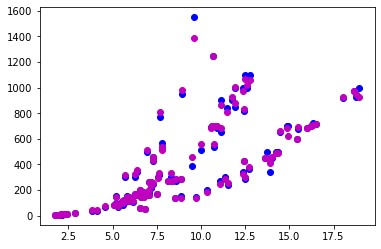

In [553]:
y_poly_pred =rf.predict(X)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df['Height'], y, color = 'b')
ax1.scatter(df['Height'], y_poly_pred, color='m' )

In [554]:
rf_scaled = make_pipeline(StandardScaler(),
                         RandomForestRegressor())

In [555]:
cross_validate(rf_scaled, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-5762.175378498815

In [556]:
cross_validate(rf_scaled, X,y, scoring =["neg_mean_squared_error", "neg_mean_absolute_error", "neg_median_absolute_error"],
              cv=KFold(random_state=123, shuffle=True))

{'fit_time': array([0.14043856, 0.12701392, 0.12496781, 0.12497306, 0.10934854]),
 'score_time': array([0.02429485, 0.        , 0.        , 0.        , 0.        ]),
 'test_neg_mean_squared_error': array([-16788.47237574,  -2091.52815245,  -4264.75155318,  -2300.07181545,
         -3987.50193645]),
 'test_neg_mean_absolute_error': array([-60.79904348, -30.121     , -43.67990909, -27.981     ,
        -42.66354545]),
 'test_neg_median_absolute_error': array([-18.73  , -11.4115, -27.165 , -10.9325, -29.025 ])}

## LassoCV

In [557]:
lasso = LassoCV( tol=0.001, cv=5)

In [558]:
cross_validate(lasso, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

C:\Users\ppand\.virtualenvs\NLP-labs-0b2hZvGQ\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12154.3810429835, tolerance: 8916.059539545455
  positive)
C:\Users\ppand\.virtualenvs\NLP-labs-0b2hZvGQ\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24426.047759030247, tolerance: 10779.737895505623
  positive)


-10264.995222064832

In [559]:
lasso_cv_scaled = make_pipeline(
    StandardScaler(),
    lasso
)

In [560]:
cross_validate(lasso_cv_scaled, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-10630.036523146942

In [561]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")

In [562]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values

X_holdout= pd.get_dummies(
    df_holdout[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values

In [563]:
lasso_cv_scaled.fit(X, y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lassocv',
                 LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001,
                         fit_intercept=True, max_iter=1000, n_alphas=100,
                         n_jobs=None, normalize=False, positive=False,
                         precompute='auto', random_state=None,
                         selection='cyclic', tol=0.001, verbose=False))],
         verbose=False)

In [564]:
y_estimate = lasso_cv_scaled.predict(X_holdout)
print(y_estimate)
print(y_true)

[ 152.99963816  135.9627054    16.34153475  435.08098507  564.322821
  214.76616339  691.23614479   -3.25526428  562.03825773  440.00853738
  525.18208656  249.296446    346.80741439  -27.73285525  439.39626657
  523.65748423 -370.63151252  607.22122328  113.99382233   47.83581252
  344.39498697  853.84430346  198.09880501  952.39045847  708.45345311
  920.58883276    8.24330513  157.11323954]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]


In [565]:
ho_mse = mean_squared_error(y_true, y_estimate)
print(ho_mse)

12280.899951287849


In [566]:
dump(lasso_cv_scaled, 'lcv.joblib') 

['lcv.joblib']

## PCA Regression

In [567]:
pca_regression = make_pipeline(
    StandardScaler(),
    PCA(n_components=3),
     LinearRegression()
)

In [568]:
cross_validate(pca_regression, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-21282.184764148406

## Ridge regression

In [569]:
df = pd.read_csv("fish_participant.csv")
y=df["Weight"].values

X= pd.get_dummies(
    df[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values


In [570]:
reg = make_pipeline(
    PolynomialFeatures(3),
     Ridge()
 )

In [571]:
cross_validate(reg, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-51488.16334897962

In [572]:
df_holdout = pd.read_csv("fish_holdout_demo.csv")
y_true=df_holdout["Weight"].values
# df_holdout = df_holdout.assign(h2=df["Height"] * df["Height"])
X_holdout= pd.get_dummies(
    df_holdout[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values

In [573]:
reg.fit(X,y)
dump(reg, "reg_hw.joblib")
y_holdout = reg.predict(X_holdout)

In [574]:
print(y_holdout)
print(y_true)
ho_mse = mean_squared_error(y_true, y_holdout)
print(ho_mse)

[ 143.10211425  150.77143334    9.20725544  431.35007856  459.25112605
  172.45709854  565.78929473   12.69043992  487.37980071  324.3247223
  501.9256305   193.25424595  256.90833964   64.23297583  352.8339921
  501.68597044   11.7300059   571.59591832  114.10725752   91.39519398
  288.95850914 1000.01836232  155.69787669 1009.41784112  735.8791762
 1047.13040038   86.15679672  156.16949925]
[ 140.   150.     9.8  430.   456.   169.   567.     8.7  340.   320.
  500.   188.   260.    70.   363.   500.     5.9  700.   125.    87.
  272.  1000.   170.  1000.   720.  1100.   100.   160. ]
1516.649592991747


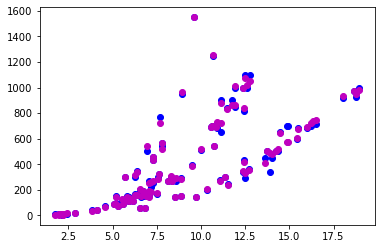

In [575]:
y_poly_pred =reg.predict(X)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df['Height'], y, color = 'b')
ax1.scatter(df['Height'], y_poly_pred, color='m' )

## Ridge - Combine the data

In [576]:
df = pd.read_csv("fish_participant.csv")
df_holdout = pd.read_csv("fish_holdout_demo.csv")
df = df.append(df_holdout, ignore_index = True)

In [577]:
y=df["Weight"].values

X= pd.get_dummies(
    df[[column for column in df.columns if (column != "Weight") ]], drop_first = True
).values

In [578]:
reg = make_pipeline(
    PolynomialFeatures(3),
     Ridge(tol=0.0001)
 )

In [579]:
reg.fit(X,y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.0001))],
         verbose=False)

In [580]:
cross_validate(reg, X,y, scoring ="neg_mean_squared_error",
              cv=KFold(random_state=123, shuffle=True))['test_score'].mean()

-23510.595053337445

In [581]:
dump(reg, "reg_hw.joblib")

['reg_hw.joblib']

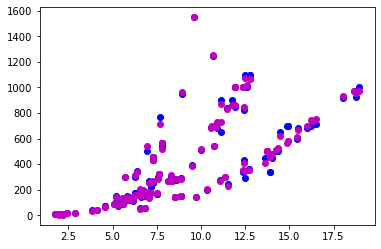

In [582]:
y_poly_pred =reg.predict(X)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df['Height'], y, color = 'b')
ax1.scatter(df['Height'], y_poly_pred, color='m' )